<h1><b><br><center><span style="color:Purple">Predict Graduate Admissions</span></center></br></b></h1>

<h3><br><span style="color:Blue">Prerana P</span></br></h3>

<h2>Predict Graduate Admissions</h2>

<b>Probelm Statement</b> This dataset is created for prediction of Graduate Admissions from an Indian perspective.



<b>Content</b> The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

1.GRE Scores ( out of 340 )</br>
2.TOEFL Scores ( out of 120 )</br>
3.University Rating ( out of 5 )</br>
4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )</br>
5.Undergraduate GPA ( out of 10 )</br>
6.Research Experience ( either 0 or 1 )</br>
7.Chance of Admit ( ranging from 0 to 1 ) is the Target Variable</br>

<b>Models</b>

Logistic Regression
Random Forest
Support Vector Machine
This Model will help Beginners as well Intermediate ML Practitioners models will be introduced. Also measure the accuracy of models that are built by using Machine Learning, and further development will be assessed.

<h2>1. Load the Data and Analysis of Variables</h2>

In [1]:
##Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the Data and check the Column Names to check the Space in the Names
df=pd.read_csv("Admission_Predict_Ver1.1 (1).csv")
col_names= df.columns.tolist()
print("Column names: ")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names: 
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


---->

1.As we said there were Space in Chance of Admit Variable</br>
2.Serial No has Full stop Sign name it as no</br>
3.Change the other variable into lowercase for easy to use

<b>Rename columns to make their use easier.</b>

In [3]:

df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

<b>The type of columns can be found as follows:</b>

In [4]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

<b>Check shape of the data and whether there exist missing values:</b>

In [5]:
df.shape

(500, 9)

print("Missing values in columns:")
df.isnull().sum()

<b>Fortunately, data has no missing values</b>

The "chance" column is the outcome variable and takes value between 0 and 1. 1 represents that the subject is admitted to the program while 0 represents rejected applications. Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, the analysis will continue as a prediction analysis of chance of admission.



<h2>2.Data Exploration</h2>

First of all, let us see the basic statistics of the data.



In [6]:
df.describe()


,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

The mean, or average.</br>
50% aka Median it is very import to understand Skeweness of the Data</br>
The standard deviation, or how spread out the data is.</br>
The minimum and maximum value of each column</br>
The number of items that fall within the first, second, and third percentiles.</br>

Second, let us analyze the distribution of subjects' chance of admit in the data. Let us see how rating affects chance of admission:

In [7]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.



In [8]:
df[df['chance']>0.82].groupby('chance').mean()


,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


<br><h2><i>Several observations:</i></h2>
Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.</br>
Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.</br>
Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%


<h2>3.Data Visualization</import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()h2>
<h3>Histogram of Admission Chance</h3>
Let us visualize our data to get a much clearer picture of the data and the significant features.



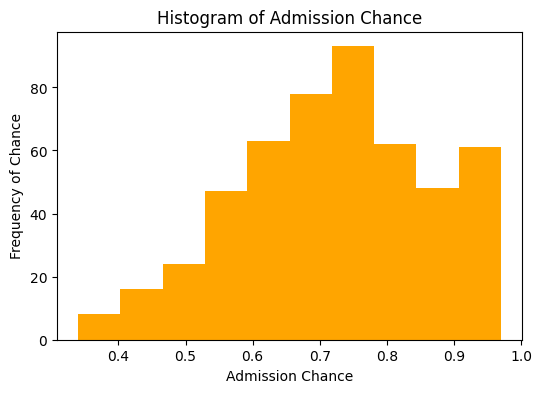

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

Histogram shows us that 'chance of admission' column is well distributed in data.

<h3>Line Plot for Research Output and The Chance of Admission</h3>

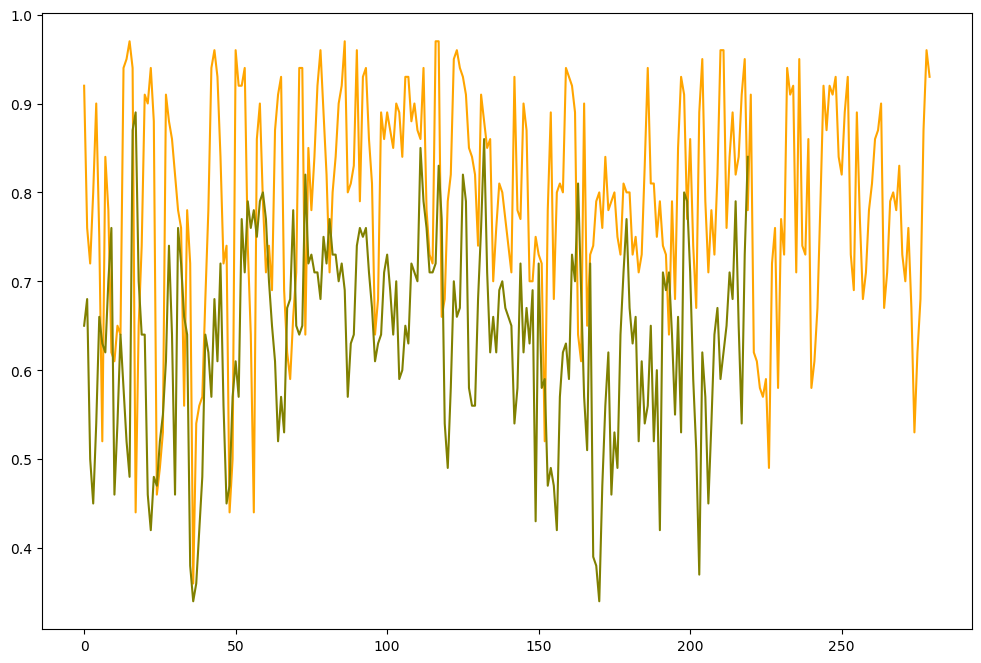

In [10]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

<h2>Scatter Plot of University Rating and The Chance of Admission</h2>

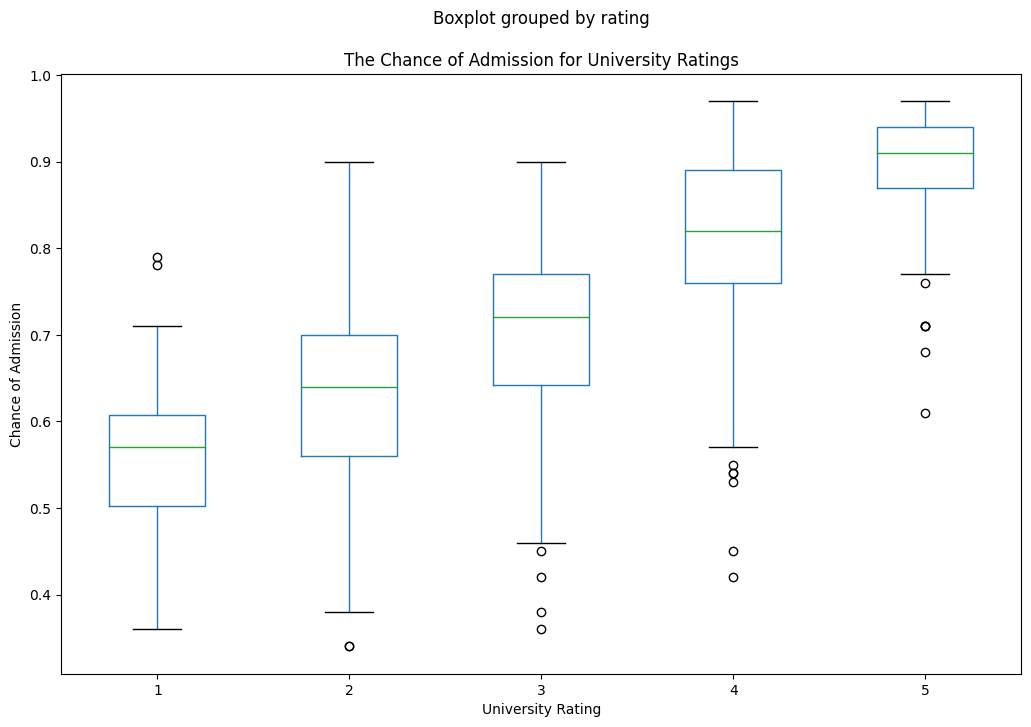

In [11]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.



<h2>Histogram of Numeric Variables</h2>

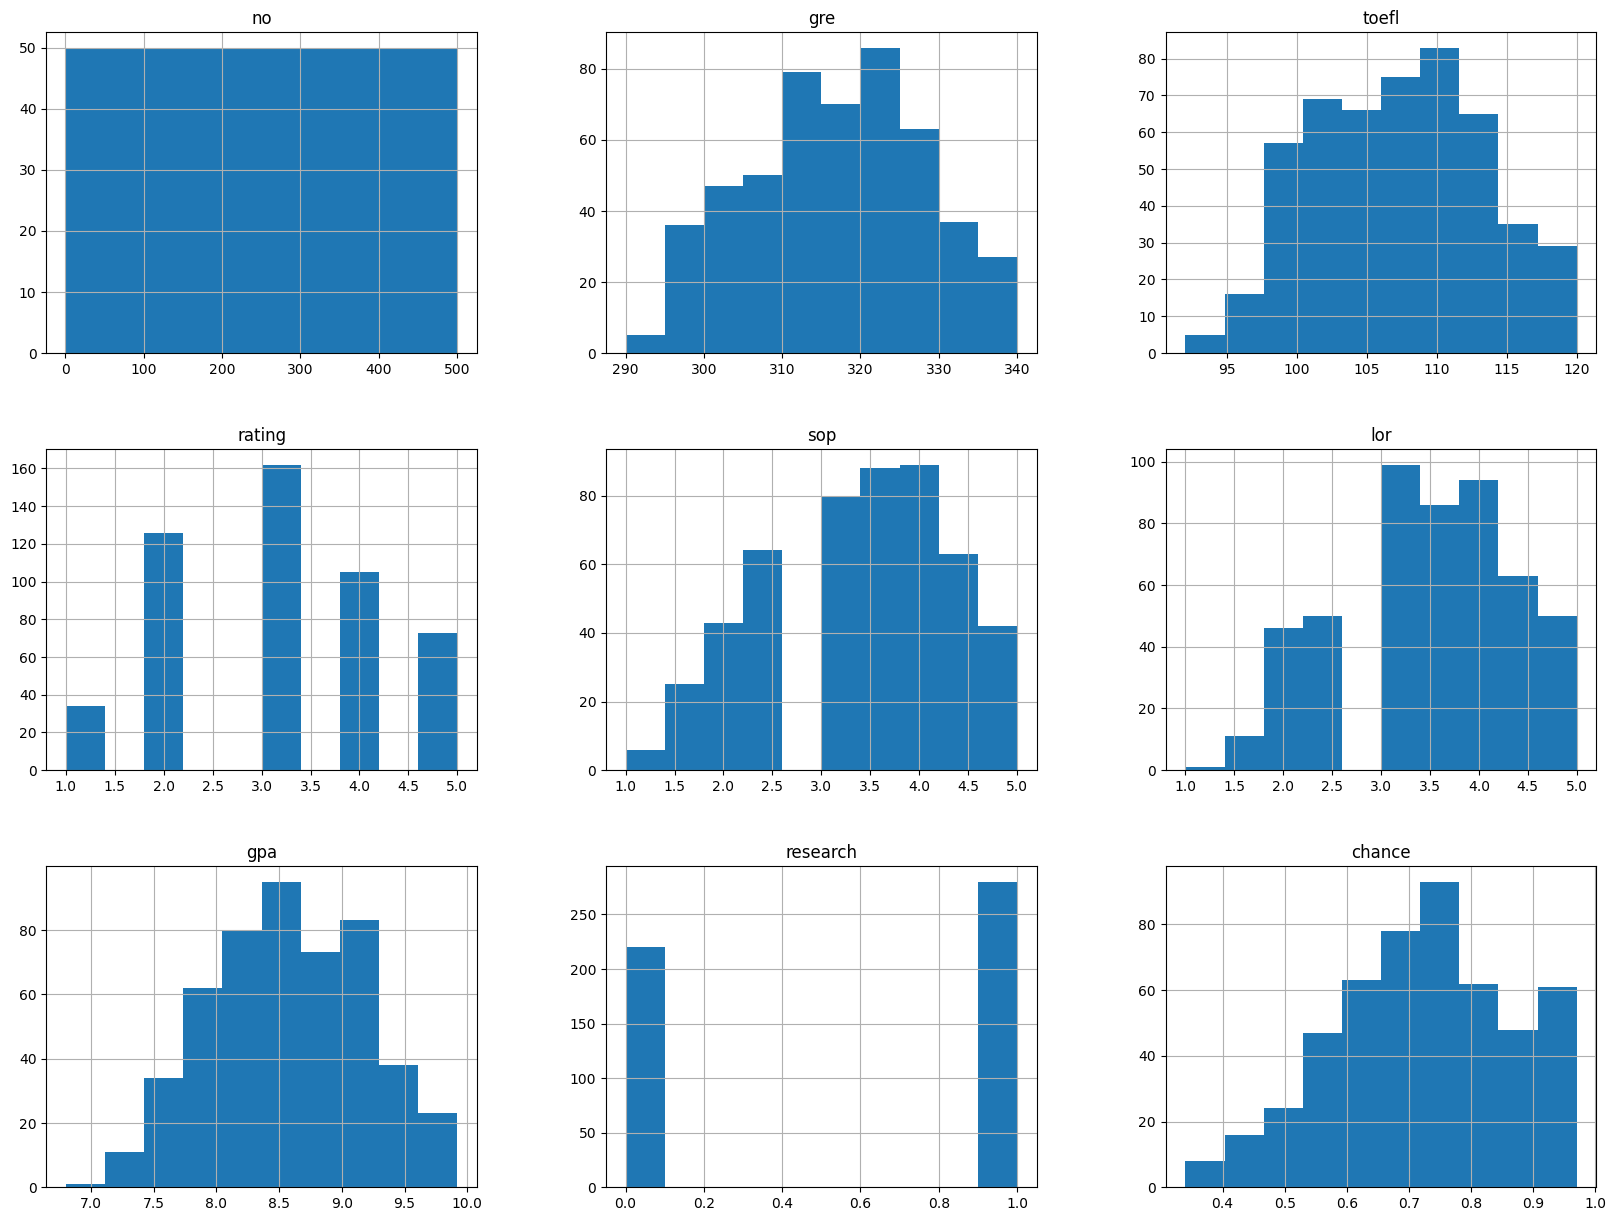

In [12]:
df.hist(bins=10, figsize=(20,15))
plt.show()

<h2>Data Preperation</h2>
As it can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

    The outcome variable is 'chance', and all other features are predictors.
    'no' variable should be dropped from dataset since it only indicator of the instances (means ID Column)


In [13]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [14]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.



In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

Data normalization is important in order to represent data in comparable scales.

In [16]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

MIN - MAX Scaler its Better use always the Scaler methods to improve the Accuracy

<h2>Classification Models & Furher Analysis</h2>

In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 83% chance. Third quartile, 83%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [17]:
import numpy as np
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

<h3>Logistic Regression</h3>

Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



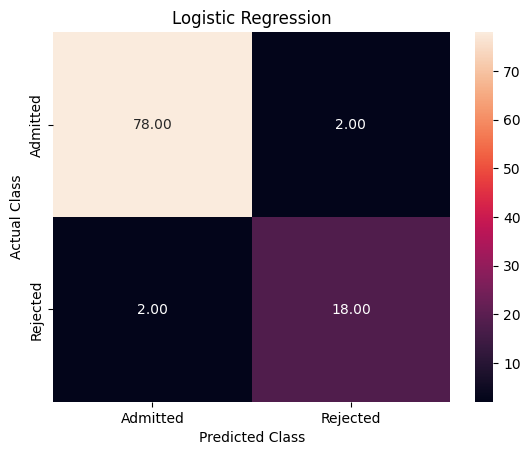

In [19]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

<h3>Random Forest</h3>

Random Forest Accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



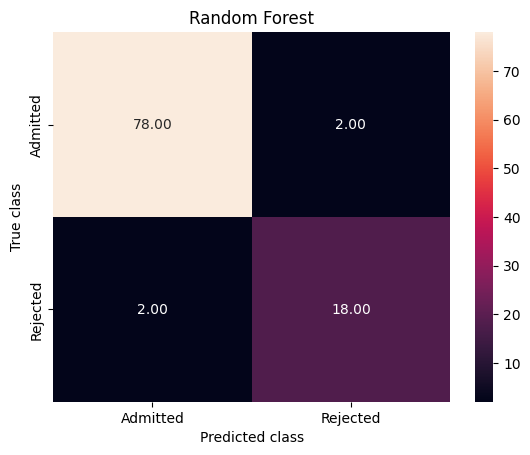

In [21]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

<h3>Support Vector Machine</h3>

Support vector machine accuracy: 0.970
--------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.95      0.90      0.92        20

    accuracy                           0.97       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.97      0.97      0.97       100



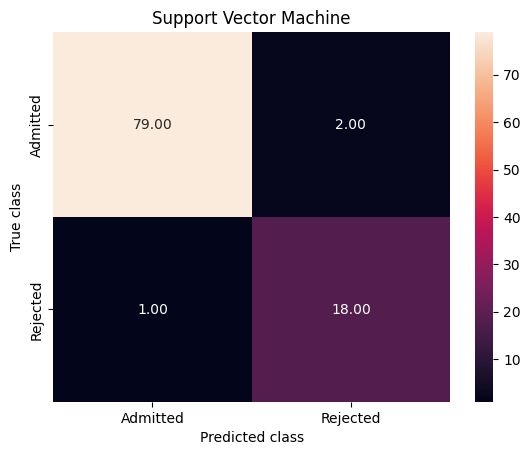

In [23]:
# Fitting support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

How often does my classifier predict admitted students correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that models ara close but logistic regression and support vector machine models are slightly better for this criteria. Out of 20 True admitted applicants, LR and SVM are correctly classified 18 of them which means the models are approximately have 90% of "recall".

How often does my classifier predict students that will be admitted correctly? This measurement is called “precision” and Random Forest performs slightly better (17 out of 18) than other classifiers.

All classifiers have the same accuracy score which is 97%.



<h2>Feature Importance for Random Forest Model</h2>

In order to represent the most important features which influence whether an applicant is admitted in college, random forest classifier is used.

In [26]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

gpa         0.414073
gre         0.182616
toefl       0.166819
sop         0.086377
rating      0.074557
lor         0.059024
research    0.016534
dtype: float64
